In [6]:
import numpy as np
import pandas as pd

study_df = pd.read_csv('/home/yiw/siim/input/train_study.csv')
train_df = pd.read_csv('/home/yiw/siim/input/train_image_level.csv')

study_df = study_df.rename(columns={'id': 'StudyInstanceUID'})
study_df

,StudyInstanceUID,Negative for Pneumonia,Typical Appearance,Indeterminate Appearance,Atypical Appearance
0,00086460a852,0,1,0,0
1,000c9c05fd14,0,0,0,1
2,00292f8c37bd,1,0,0,0
3,005057b3f880,1,0,0,0
4,0051d9b12e72,0,0,0,1
...,...,...,...,...,...
6049,ffcb4630f46f,0,1,0,0
6050,ffe4d6e8fbb0,0,1,0,0
6051,ffe94fcb14fa,0,1,0,0
6052,ffebf1ef4a9c,0,1,0,0


In [1]:
import pandas as pd
train_df = pd.read_csv('/home/yiw/siim/input/train_level.csv')
train_df.head(3)

,id,boxes,label,StudyInstanceUID,Negative for Pneumonia,Typical Appearance,Indeterminate Appearance,Atypical Appearance,path
0,000a312787f2_image,"[{'x': 789.28836, 'y': 582.43035, 'width': 102...",opacity 1 789.28836 582.43035 1815.94498 2499....,5776db0cec75,0,1,0,0,/home/yiw/siim/input/train/000a312787f2.png
1,000c3a3f293f_image,NaN,none 1 0 0 1 1,ff0879eb20ed,1,0,0,0,/home/yiw/siim/input/train/000c3a3f293f.png
2,0012ff7358bc_image,"[{'x': 677.42216, 'y': 197.97662, 'width': 867...",opacity 1 677.42216 197.97662 1545.21983 1197....,9d514ce429a7,0,1,0,0,/home/yiw/siim/input/train/0012ff7358bc.png


In [2]:
target_cols = train_df.iloc[:, 4:-1].columns.tolist()
train_df[target_cols]

,Negative for Pneumonia,Typical Appearance,Indeterminate Appearance,Atypical Appearance
0,0,1,0,0
1,1,0,0,0
2,0,1,0,0
3,0,0,0,1
4,0,1,0,0
...,...,...,...,...
6329,1,0,0,0
6330,1,0,0,0
6331,0,1,0,0
6332,0,1,0,0


In [6]:
train_df.iloc[:, 4:-1].columns.tolist()

['Negative for Pneumonia',
 'Typical Appearance',
 'Indeterminate Appearance',
 'Atypical Appearance']

In [8]:
train_df = train_df.merge(study_df, on='StudyInstanceUID')
train_df.head(20)

,id,boxes,label,StudyInstanceUID,Negative for Pneumonia,Typical Appearance,Indeterminate Appearance,Atypical Appearance
0,000a312787f2_image,"[{'x': 789.28836, 'y': 582.43035, 'width': 102...",opacity 1 789.28836 582.43035 1815.94498 2499....,5776db0cec75,0,1,0,0
1,000c3a3f293f_image,NaN,none 1 0 0 1 1,ff0879eb20ed,1,0,0,0
2,0012ff7358bc_image,"[{'x': 677.42216, 'y': 197.97662, 'width': 867...",opacity 1 677.42216 197.97662 1545.21983 1197....,9d514ce429a7,0,1,0,0
3,001398f4ff4f_image,"[{'x': 2729, 'y': 2181.33331, 'width': 948.000...",opacity 1 2729 2181.33331 3677.00012 2785.33331,28dddc8559b2,0,0,0,1
4,001bd15d1891_image,"[{'x': 623.23328, 'y': 1050, 'width': 714, 'he...",opacity 1 623.23328 1050 1337.23328 2156 opaci...,dfd9fdd85a3e,0,1,0,0
5,0022227f5adf_image,"[{'x': 1857.2065, 'y': 508.30565, 'width': 376...",opacity 1 1857.2065 508.30565 2233.23384 907.8...,84543edc24c2,0,0,1,0
6,0023f02ae886_image,NaN,none 1 0 0 1 1,2fa400b873f5,1,0,0,0
7,002e9b2128d0_image,"[{'x': 276.72917, 'y': 627.42968, 'width': 910...",opacity 1 276.72917 627.42968 1187.31776 2283....,0717c8ac304f,0,1,0,0
8,00326161e51e_image,"[{'x': 542.96057, 'y': 364.37257, 'width': 590...",opacity 1 542.96057 364.37257 1133.32317999999...,a81050391441,0,1,0,0
9,0044e449aae1_image,"[{'x': 1703.78756, 'y': 938.29333, 'width': 91...",opacity 1 1703.78756 938.29333 2614.8275599999...,b60f2d2cc642,0,1,0,0


In [14]:
train_df.to_csv('train_level.csv', index=False)

In [13]:
train_df = pd.read_csv('/home/yiw/siim/input/train_level.csv')
train_df['path'] = train_df['id'].apply(lambda x: '/home/yiw/siim/input/train/{0}.png'.format(x[:-6]))
train_df.head(20)

,id,boxes,label,StudyInstanceUID,Negative for Pneumonia,Typical Appearance,Indeterminate Appearance,Atypical Appearance,path
0,000a312787f2_image,"[{'x': 789.28836, 'y': 582.43035, 'width': 102...",opacity 1 789.28836 582.43035 1815.94498 2499....,5776db0cec75,0,1,0,0,/home/yiw/siim/input/train/000a312787f2.png
1,000c3a3f293f_image,NaN,none 1 0 0 1 1,ff0879eb20ed,1,0,0,0,/home/yiw/siim/input/train/000c3a3f293f.png
2,0012ff7358bc_image,"[{'x': 677.42216, 'y': 197.97662, 'width': 867...",opacity 1 677.42216 197.97662 1545.21983 1197....,9d514ce429a7,0,1,0,0,/home/yiw/siim/input/train/0012ff7358bc.png
3,001398f4ff4f_image,"[{'x': 2729, 'y': 2181.33331, 'width': 948.000...",opacity 1 2729 2181.33331 3677.00012 2785.33331,28dddc8559b2,0,0,0,1,/home/yiw/siim/input/train/001398f4ff4f.png
4,001bd15d1891_image,"[{'x': 623.23328, 'y': 1050, 'width': 714, 'he...",opacity 1 623.23328 1050 1337.23328 2156 opaci...,dfd9fdd85a3e,0,1,0,0,/home/yiw/siim/input/train/001bd15d1891.png
5,0022227f5adf_image,"[{'x': 1857.2065, 'y': 508.30565, 'width': 376...",opacity 1 1857.2065 508.30565 2233.23384 907.8...,84543edc24c2,0,0,1,0,/home/yiw/siim/input/train/0022227f5adf.png
6,0023f02ae886_image,NaN,none 1 0 0 1 1,2fa400b873f5,1,0,0,0,/home/yiw/siim/input/train/0023f02ae886.png
7,002e9b2128d0_image,"[{'x': 276.72917, 'y': 627.42968, 'width': 910...",opacity 1 276.72917 627.42968 1187.31776 2283....,0717c8ac304f,0,1,0,0,/home/yiw/siim/input/train/002e9b2128d0.png
8,00326161e51e_image,"[{'x': 542.96057, 'y': 364.37257, 'width': 590...",opacity 1 542.96057 364.37257 1133.32317999999...,a81050391441,0,1,0,0,/home/yiw/siim/input/train/00326161e51e.png
9,0044e449aae1_image,"[{'x': 1703.78756, 'y': 938.29333, 'width': 91...",opacity 1 1703.78756 938.29333 2614.8275599999...,b60f2d2cc642,0,1,0,0,/home/yiw/siim/input/train/0044e449aae1.png


In [15]:
train_df.to_csv('train_level.csv', index=False)

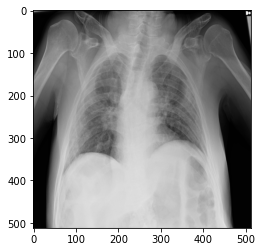

In [11]:
import cv2

img = cv2.imread('/home/yiw/siim/input/train/000a312787f2.png')
import matplotlib.pyplot as plt

plt.imshow(img)

In [7]:
study_df['sum'] = study_df.apply(lambda x: x[1:].sum(), axis=1)
study_df

,id,Negative for Pneumonia,Typical Appearance,Indeterminate Appearance,Atypical Appearance,sum
0,00086460a852,0,1,0,0,1
1,000c9c05fd14,0,0,0,1,1
2,00292f8c37bd,1,0,0,0,1
3,005057b3f880,1,0,0,0,1
4,0051d9b12e72,0,0,0,1,1
...,...,...,...,...,...,...
6049,ffcb4630f46f,0,1,0,0,1
6050,ffe4d6e8fbb0,0,1,0,0,1
6051,ffe94fcb14fa,0,1,0,0,1
6052,ffebf1ef4a9c,0,1,0,0,1


In [62]:
train_level_df[train_level_df.StudyInstanceUID == '508d6acdc4ce']

,id,boxes,label,StudyInstanceUID
1003,28cd1f82f1be_image,"[{'x': 1187.69778, 'y': 404.54322, 'width': 57...",opacity 1 1187.69778 404.54322 1765.3556199999...,508d6acdc4ce


In [8]:
sum(study_level_df['sum'] == 1)

6054

In [10]:
sample_df = train_level_df[train_level_df.StudyInstanceUID == '0fd2db233deb']
sample_df

,id,boxes,label,StudyInstanceUID
130,04cc2f7f4c4b_image,NaN,none 1 0 0 1 1,0fd2db233deb
156,05c063f5cef5_image,NaN,none 1 0 0 1 1,0fd2db233deb
551,156cb1f5c689_image,NaN,none 1 0 0 1 1,0fd2db233deb
964,26f643772090_image,"[{'x': 561.30269, 'y': 163.28797, 'width': 883...",opacity 1 561.30269 163.28797 1445.02377 1495....,0fd2db233deb
1861,4c414b793562_image,NaN,none 1 0 0 1 1,0fd2db233deb
4044,a5a364383f34_image,NaN,none 1 0 0 1 1,0fd2db233deb
4340,b121806162c3_image,NaN,none 1 0 0 1 1,0fd2db233deb
4698,bee62c601ae9_image,NaN,none 1 0 0 1 1,0fd2db233deb
4902,c6e92e59a0ae_image,NaN,none 1 0 0 1 1,0fd2db233deb


In [12]:
images = list(map(lambda x: x[:-6], list(sample_df.id)))
images

['04cc2f7f4c4b',
 '05c063f5cef5',
 '156cb1f5c689',
 '26f643772090',
 '4c414b793562',
 'a5a364383f34',
 'b121806162c3',
 'bee62c601ae9',
 'c6e92e59a0ae']

In [13]:
sample_df.id

130     04cc2f7f4c4b_image
156     05c063f5cef5_image
551     156cb1f5c689_image
964     26f643772090_image
1861    4c414b793562_image
4044    a5a364383f34_image
4340    b121806162c3_image
4698    bee62c601ae9_image
4902    c6e92e59a0ae_image
Name: id, dtype: object

/home/yiw/siim/input/train/04cc2f7f4c4b.png
/home/yiw/siim/input/train/05c063f5cef5.png
/home/yiw/siim/input/train/156cb1f5c689.png
/home/yiw/siim/input/train/26f643772090.png
/home/yiw/siim/input/train/4c414b793562.png
/home/yiw/siim/input/train/a5a364383f34.png
/home/yiw/siim/input/train/b121806162c3.png
/home/yiw/siim/input/train/bee62c601ae9.png
/home/yiw/siim/input/train/c6e92e59a0ae.png


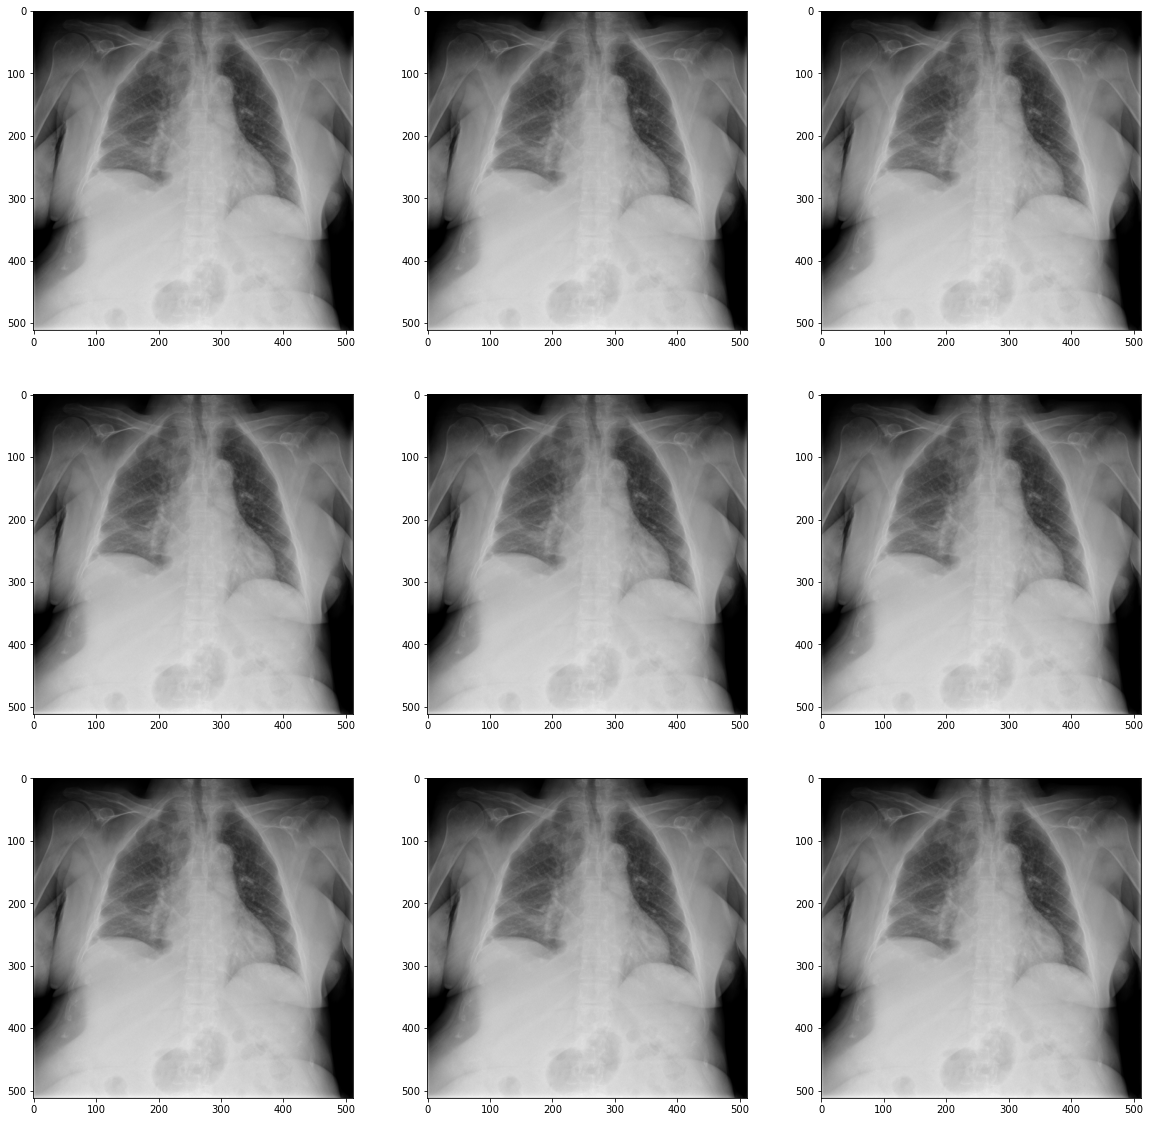

In [22]:
import matplotlib.pyplot as plt
import cv2

fig, axes = plt.subplots(3, 3, figsize=(20, 20))
for idx, i in enumerate(images):
    fi = '/home/yiw/siim/input/train/' + i + '.png'
    print(fi)
    img = cv2.imread(fi)
    axes[idx//3][idx%3].imshow(img, cmap='gray')
plt.show()

In [13]:
study_level_df[study_level_df.id == '0fd2db233deb']

,id,Negative for Pneumonia,Typical Appearance,Indeterminate Appearance,Atypical Appearance
361,0fd2db233deb,0,0,1,0


In [14]:
image_level_df.head(9)

NameError: name 'image_level_df' is not defined

In [38]:
image_level_df.iloc[2].boxes

"[{'x': 677.42216, 'y': 197.97662, 'width': 867.79767, 'height': 999.78214}, {'x': 1792.69064, 'y': 402.5525, 'width': 617.02734, 'height': 1204.358}]"

In [41]:
image_level_df.iloc[8].label

'opacity 1 542.96057 364.37257 1133.3231799999999 1254.15342 opacity 1 1743.45854 782.42827 2359.24345 1553.5716400000001'

In [43]:
study_df[study_df.id == image_level_df.iloc[1].StudyInstanceUID]

,id,Negative for Pneumonia,Typical Appearance,Indeterminate Appearance,Atypical Appearance
6032,ff0879eb20ed,1,0,0,0


In [4]:
image_level_df.columns

Index(['id', 'boxes', 'label', 'StudyInstanceUID'], dtype='object')

In [5]:
image_level_df.boxes[2]

"[{'x': 677.42216, 'y': 197.97662, 'width': 867.79767, 'height': 999.78214}, {'x': 1792.69064, 'y': 402.5525, 'width': 617.02734, 'height': 1204.358}]"

In [6]:
import os

print(len(os.listdir('/home/yiw/siim/input/train')))
print(len(os.listdir('/home/yiw/siim/input/test')))

6334
1263


In [36]:
study_df[study_df.id == '00908ffd2d08']

,id,Negative for Pneumonia,Typical Appearance,Indeterminate Appearance,Atypical Appearance
6,00908ffd2d08,1,0,0,0


In [19]:
id = '015a2029ad0c.png'
l = os.listdir('/home/yiw/siim/input/train')
id in l

False

In [11]:
image_level_df.shape

(6334, 4)

Dataset.file_meta -------------------------------
(0002, 0002) Media Storage SOP Class UID         UI: Digital X-Ray Image Storage - For Presentation
(0002, 0003) Media Storage SOP Instance UID      UI: 1.2.840.113654.2.70.1.59189821846420219299438915042640676800
(0002, 0010) Transfer Syntax UID                 UI: Explicit VR Little Endian
-------------------------------------------------
(0008, 0005) Specific Character Set              CS: 'ISO_IR 100'
(0008, 0008) Image Type                          CS: ['ORIGINAL', 'PRIMARY', '']
(0008, 0016) SOP Class UID                       UI: 71228e4340de
(0008, 0018) SOP Instance UID                    UI: 65761e66de9f
(0008, 0020) Study Date                          DA: '4545ba78b753'
(0008, 0030) Study Time                          TM: 'bf1677526b2b'
(0008, 0050) Accession Number                    SH: '5f20f119e3df'
(0008, 0060) Modality                            CS: 'DX'
(0009, 0010) Private Creator                     LO: 'GEIIS'
(0010

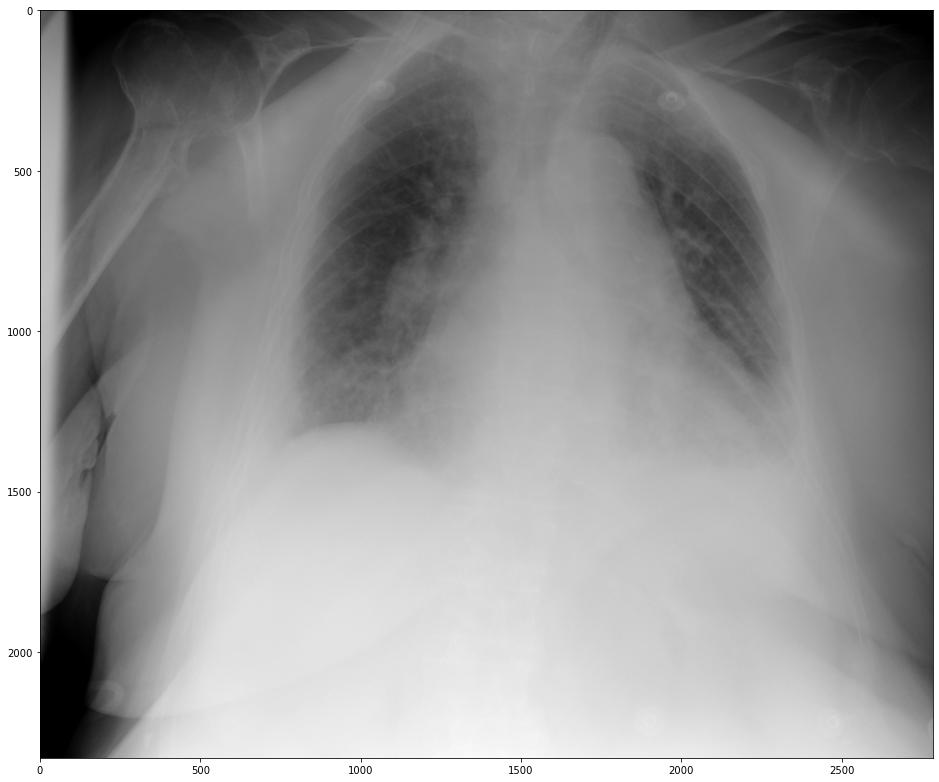

In [18]:
import pydicom
from pydicom.pixel_data_handlers.util import apply_voi_lut
import matplotlib.pyplot as plt

filepath = '/home/yiw/Downloads/65761e66de9f.dcm'

def dicom2array(path, voi_lut=True, fix_monochrome=True):
    dicom = pydicom.read_file(path)
    print(dicom)
    # VOI LUT (if available by DICOM device) is used to
    # transform raw DICOM data to "human-friendly" view
    if voi_lut:
        data = apply_voi_lut(dicom.pixel_array, dicom)
    else:
        data = dicom.pixel_array
    # depending on this value, X-ray may look inverted - fix that:
    if fix_monochrome and dicom.PhotometricInterpretation == "MONOCHROME1":
        data = np.amax(data) - data
    data = data - np.min(data)
    data = data / np.max(data)
    data = (data * 255).astype(np.uint8)
    return data

data = dicom2array(filepath)
plt.figure(figsize=(16, 16))
plt.imshow(data, cmap='gray')

In [ ]:
# study_level_df['id'] = study_level_df['id'].apply(lambda x: x[:-6])
# study_level_df.head(9)
# study_level_df.to_csv('input/train_study.csv', index=False)
# study_df = pd.read_csv('input/train_study.csv')

In [61]:
# fh = open('names')
# names = list(map(lambda x: x[:-5], fh.readlines()))
# df = pd.DataFrame(names)
# df.to_csv('names.csv', index=False)

In [2]:
import pandas as pd

sample_df = pd.read_csv('/home/yiw/siim/input/sample_submission.csv')
sample_df.shape

(2477, 2)

In [9]:
sample_df

,id,PredictionString
0,00188a671292_study,negative 1 0 0 1 1
1,004bd59708be_study,negative 1 0 0 1 1
2,00508faccd39_study,negative 1 0 0 1 1
3,006486aa80b2_study,negative 1 0 0 1 1
4,00655178fdfc_study,negative 1 0 0 1 1
...,...,...
2472,46719b856de1_image,none 1 0 0 1 1
2473,31c07523a69a_image,none 1 0 0 1 1
2474,f77d7d1aebab_image,none 1 0 0 1 1
2475,ccc5b63ca96d_image,none 1 0 0 1 1


In [13]:
ids = list(sample_df.id)
len(ids)

2477

In [24]:
studys = ['study' in id for id in ids]
len(studys)

2477

In [37]:
studys[1213]

True